25 October 2020
Author: Maria Palomino
Title: County Perfomance by Demographic

Description:
  this notebook will populate perfomance for all 9 counties by demographic 
  using data from the California Department of Education
  https://www.cde.ca.gov/ta/ac/cm/datafiles2019.asp

Printing English Performance


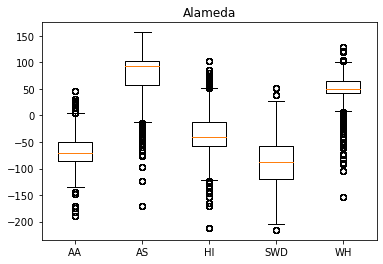

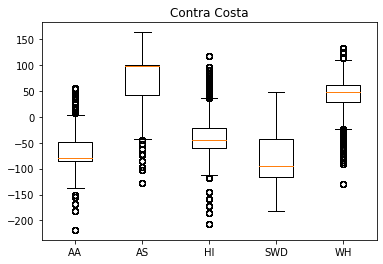

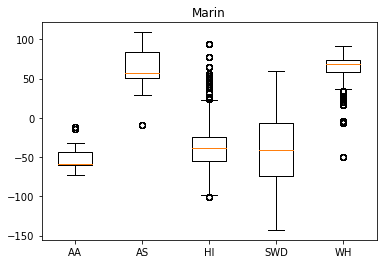

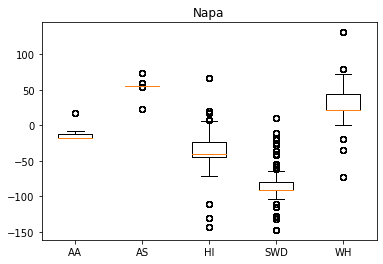

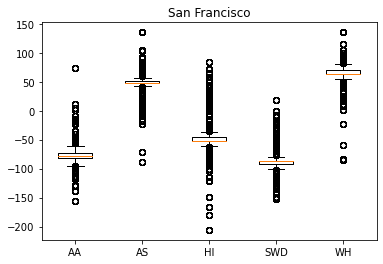

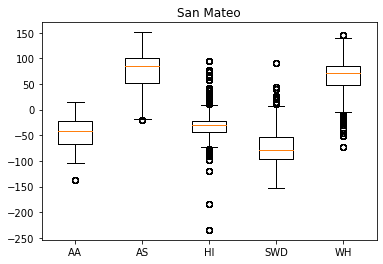

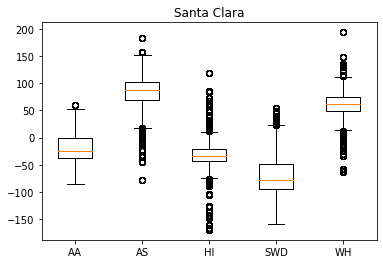

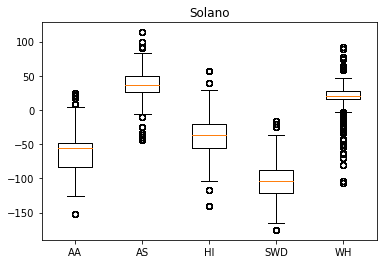

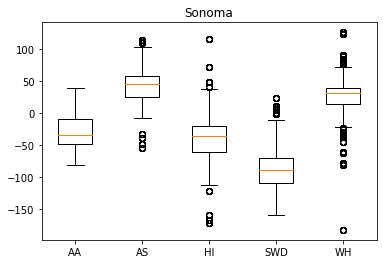

In [1]:


#updated with seperate english now.
# make sure to make it seperated with math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #importing plot w/ matplotlib 
from pandas import ExcelWriter
from pandas import ExcelFile

counties = ["Alameda", "Contra Costa", "Marin", "Napa", "San Francisco",
               "San Mateo", "Santa Clara", "Solano", "Sonoma"]

# importing all files by demographic MATH
fileAA = pd.read_excel('new2019AA.xlsx')
fileHI = pd.read_excel('new2019HI.xlsx')
fileWH = pd.read_excel('new2019WH.xlsx')
fileAS = pd.read_excel('new2019AS.xlsx')
fileSWD = pd.read_excel('new2019SWD.xlsx')

# importing all files by demographic ENGLISH
E_AA = pd.read_excel('AA_ela.xlsx')
E_AS = pd.read_excel('AS_ela.xlsx')
E_HI = pd.read_excel('HI_ela.xlsx')
E_WH = pd.read_excel('WH_ela.xlsx')
E_SWD = pd.read_excel('SWD_ela.xlsx')

#returning math component
def getFileM (a): # e.g getFile("AA")
    if a == "AA":
        return fileAA
    if a == "HI":
        return fileHI
    if a == "WH":
        return fileWH
    if a == "AS":
        return fileAS
    if a == "SWD":
        return fileSWD

#returning english component    
def getFileE (a):
     if a == "AA":
        return E_AA
     if a == "HI":
        return E_HI
     if a == "WH":
        return E_WH
     if a == "AS":
        return E_AS
     if a == "SWD":
        return E_SWD

    
def runMath(a, b): # a = group, b = county
    file = getFileM(a) # returns math
    bayCurStat = []
    bayCurDenom = []
    bayStatGroup = []
    for j in range(len(file)):
        if file['countyname'][j]== b:
            bayCurStat.append(file['currstatus'][j])
            bayCurDenom.append(file['currdenom'][j])
    bayStatGroup = np.repeat(bayCurStat,bayCurDenom)
    bayStatGroup = bayStatGroup[~np.isnan(bayStatGroup)]
    return bayStatGroup

def runEng(a,b): # a = group, b = county
    file_ela = getFileE(a) # returns english
    bayCurStat = []
    bayCurDenom = []
    bayStatGroup = []
    for j in range(len(file_ela)):
        if file_ela['countyname'][j]== b:
            bayCurStat.append(file_ela['currstatus'][j])
            bayCurDenom.append(file_ela['currdenom'][j])
    bayStatGroup = np.repeat(bayCurStat,bayCurDenom)
    bayStatGroup = bayStatGroup[~np.isnan(bayStatGroup)]
    return bayStatGroup
    
# countySeperate() used to seperate by desired county (e.g changing 'sf' to desired county)
# jumbles all the data (english and math) and returns a list of both the currentStatus and currentDenom
def countySeperate(a,b): # a = group, b = county
    file = getFileM(a) # returns math
    file_ela = getFileE(a) #returns english 
    bayCurStat = []
    bayCurDenom = []
    bayStatGroup = []
    for j in range(len(file)):
        if file['countyname'][j]== b:
            bayCurStat.append(file['currstatus'][j])
            bayCurDenom.append(file['currdenom'][j])
    for k in range(len(file_ela)):
        if file_ela['countyname'][k] == b:
            bayCurStat.append(file_ela['currstatus'][k])
            bayCurDenom.append(file_ela['currdenom'][k])
    bayStatGroup = np.repeat(bayCurStat,bayCurDenom)
    bayStatGroup = bayStatGroup[~np.isnan(bayStatGroup)]
    return bayStatGroup

# generates box plot general Math and English perform for all demographics in that county
def specificBP(b):
    #a = demographic
    #b = district/county
    groups = ["AA", "AS", "HI", "SWD", "WH"]
    allCurrStat = []
    for i in range (len(groups)):
        statsTotal = countySeperate(groups[i], b)
        allCurrStat.append(statsTotal)
    data = allCurrStat
    ax1 = plt.subplot()
    ax1.set_title(b)
    ax1.boxplot(data, labels = ['AA', 'AS', 'HI', 'SWD', 'WH'])
    plt.show()


    
def eng_run(b):
    groups = ["AA", "AS", "HI", "SWD", "WH"]
    engStat = []
    for i in range(len(groups)):
        statTotal = runEng(groups[i],b)
        engStat.append(statTotal)
    data = engStat
    ax1 = plt.subplot()
    ax1.set_title(b)
    ax1.boxplot(data, labels = ['AA', 'AS', 'HI', 'SWD', 'WH'])
    plt.show()

def mat_run(b):
    groups = ["AA", "AS", "HI", "SWD", "WH"]
    matStat = []
    for i in range(len(groups)):
        statTotal = runMath(groups[i],b)
        matStat.append(statTotal)
    data = matStat
    ax1 = plt.subplot()
    ax1.set_title(b)
    ax1.boxplot(data, labels = ['AA', 'AS', 'HI', 'SWD', 'WH'])
    plt.show()

#print("Printing all County Performance\n")
    #print all counties
#for i in range (len(counties)):
 #   specificBP(counties[i])

print("Printing English Performance")
for i in range (len(counties)):
    eng_run(counties[i])
    
#print("Printing Math Performance")
#for i in range (len(counties)):
#    mat_run(counties[i])
    

#specificBP("San Francisco")
#specificBP("Alameda")
